In [19]:
""" This file plots the distribution of data feed into the ML """

from __init__ import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [20]:
# for the Jupyter environment, this is only coded to work if it the filel exists. 
# it will error due to module location issues between VS code and JP Notebook
#checks for preprocessed files and processed them if needed
csv_names = {'markets.csv': '../Cleaning_preprocessing/ETF_preprocessing/etf_preprocessing.py',
            'presidents.csv': '../Cleaning_preprocessing/President_preprocessing/president_preprocessing.py', 
            'minerals.csv': '../Cleaning_preprocessing/Mineral_preprocessing/mineral_preprocessing.py'}
for n in csv_names:
    print('Checking for file', n)
    if os.path.exists('../Cleaned_data/'+n):
        print(n, 'exists.')
        continue
    else:
        with open(csv_names[n]) as f:
            exec(f.read())

Checking for file markets.csv
markets.csv exists.
Checking for file presidents.csv
presidents.csv exists.
Checking for file minerals.csv
minerals.csv exists.


1999 2017


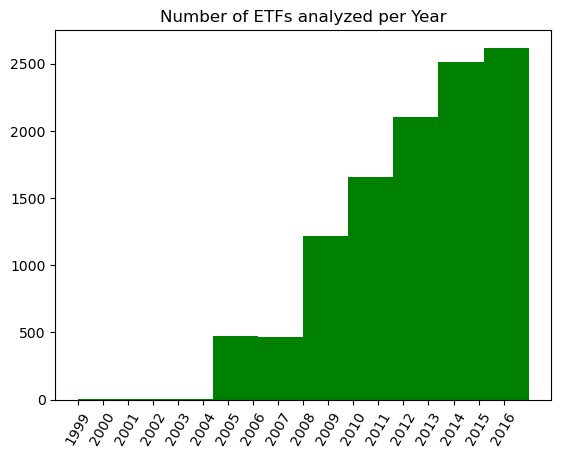

In [21]:
""" Display the distribution of avaliable data from the Market Data Source"""  


#file locations
president_df = pd.read_csv('../Cleaned_data/presidents.csv')
mineral_df = pd.read_csv('../Cleaned_data/minerals.csv')
market_df = pd.read_csv('../Cleaned_data/markets.csv')

data_dfs = [mineral_df,market_df]

# shows the amount of data available for each year
year_count = market_df.Year
plt.hist(year_count, color='green')

# make x ticks print years in whole numbers
loc, labels = plt.xticks()
print((year_count.min()), (year_count.max()))
plt.xticks(np.arange(year_count.min(), year_count.max(),1), rotation = 60)

#add title and display plot
plt.title('Number of ETFs analyzed per Year')
plt.show()

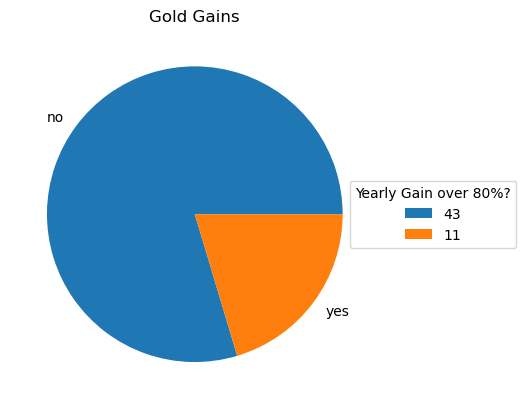

In [22]:
""" Display the precent of gains in gold data"""

x_values = mineral_df[mineral_df.Asset_name == 'gold_price'].Gain.value_counts()
plt.pie(x_values, labels = x_values.index)
plt.legend(x_values,
            loc="center left",
            bbox_to_anchor=(.9, 0, 0.75, 1),
            title = 'Yearly Gain over 80%?')

plt.title('Gold Gains')
plt.show()

In [23]:
model_names = ['gold', 'silver', 'market']
model_dir = '/home/sloya7/miniconda3/election_economics_capstone/saved_ML_models/'

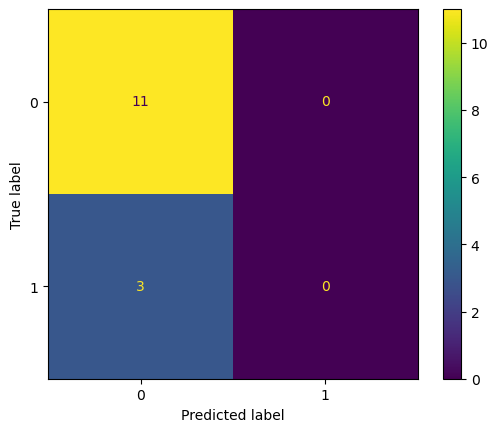

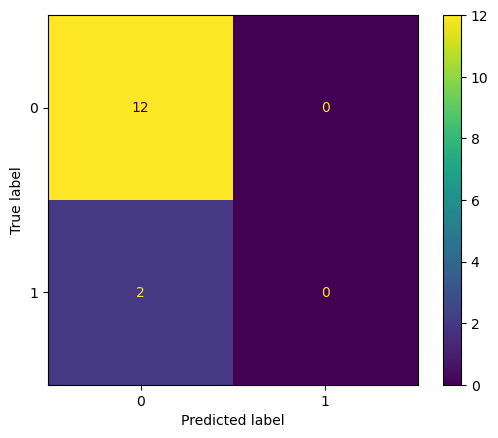

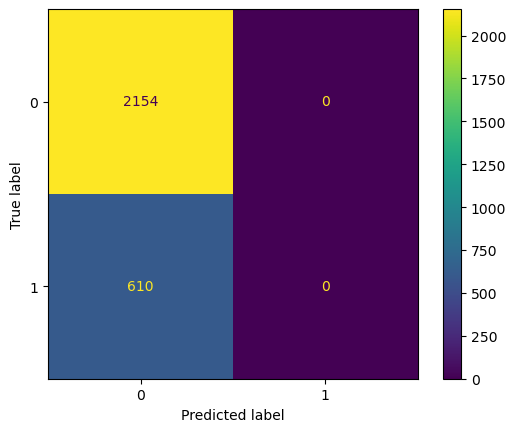

In [24]:
for name in model_names:
        #create the string path for pkl file
        model_path = '/'.join([model_dir,name +'.pkl'])
        model_package = joblib.load(model_path)
        
        #the file is a dictionary so assign what is the model and what is the data package
        model = model_package[0]
        package = model_package[1]   

        preds = model.predict(package[2])
        
        con_mat = confusion_matrix(package[5],preds)

        graph = ConfusionMatrixDisplay(confusion_matrix=con_mat)

        graph.plot()
        
        plt.show()
        